In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import joblib
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\original\Downloads\Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df=df.drop_duplicates()

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

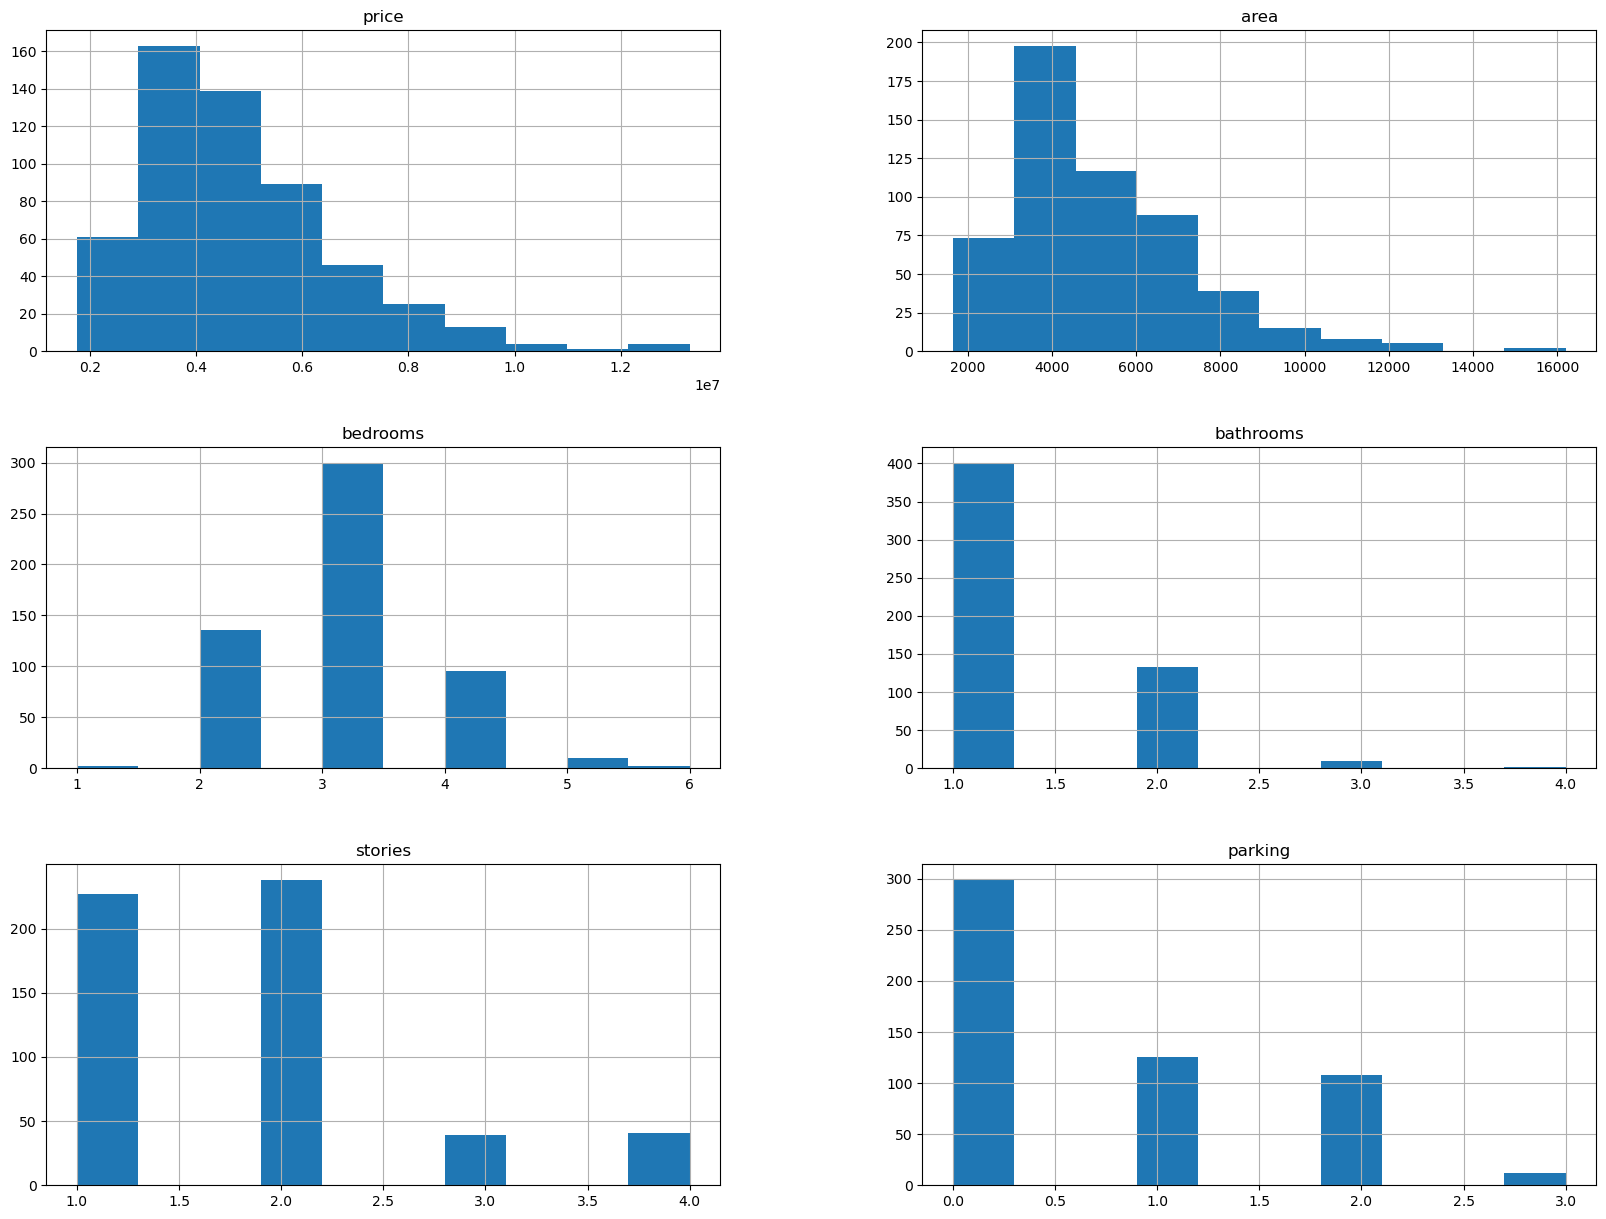

In [4]:
df.hist(bins=10, figsize=(20,15))

In [5]:
label_encoders = {}
for column in ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
df=pd.get_dummies(df, columns=['furnishingstatus'])

In [6]:
X=df.drop('price',axis=1)
Y=df['price']

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=20,random_state=42)

In [8]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [15]:
Y_predict=model.predict(X_test)

In [16]:
mse= mean_squared_error(Y_test, Y_predict)
print("Mean Squared Error:", mse)

Mean Squared Error: 1481674252126.4548


In [17]:
joblib.dump(model,r"C:\Users\original\Downloads\Housing.pk1")

['C:\\Users\\original\\Downloads\\Housing.pk1']

In [18]:
def predict_house_price(model,features):
    input_data=pd.DataFrame([features],columns=X.columns)
    predict_price=model.predict(input_data)
    return predict_price

In [27]:
user_input={}
for column in X.columns:
    user_input[column]=int(input(f"Enter {column}:"))
predict_price=predict_house_price(model,user_input)
print("predict price for house is:",predict_price[0])

Enter area:200
Enter bedrooms:2
Enter bathrooms:2
Enter stories:1
Enter mainroad:1
Enter guestroom:0
Enter basement:1
Enter hotwaterheating:1
Enter airconditioning:2
Enter parking:3
Enter prefarea:3
Enter furnishingstatus_furnished:0
Enter furnishingstatus_semi-furnished:1
Enter furnishingstatus_unfurnished:1
predict price for house is: 8536102.540377246
